C:\Users\agust\AppData\Local\Temp\ipykernel_26632\149497912.py:22: DeprecationWarning: Call to deprecated method getCaseNumber. (use method which follows pep8) -- Deprecated since version 1.0.0.
  for i in range(0, data_montecarlo.getCaseNumber() - 1):


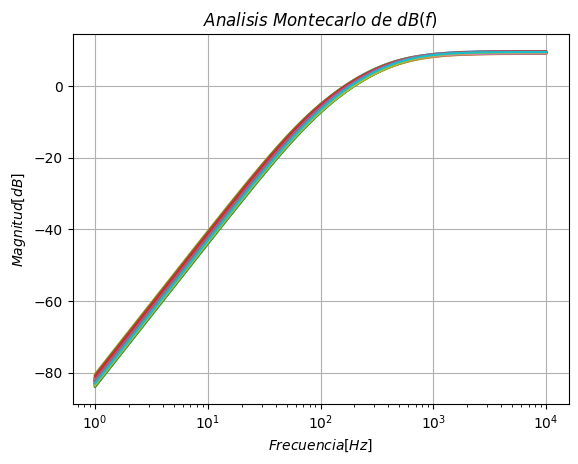

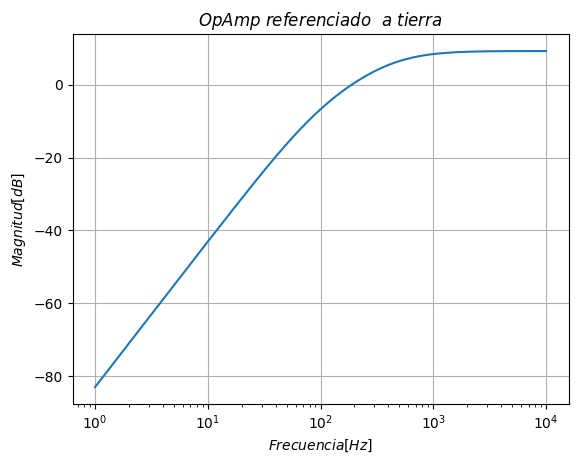

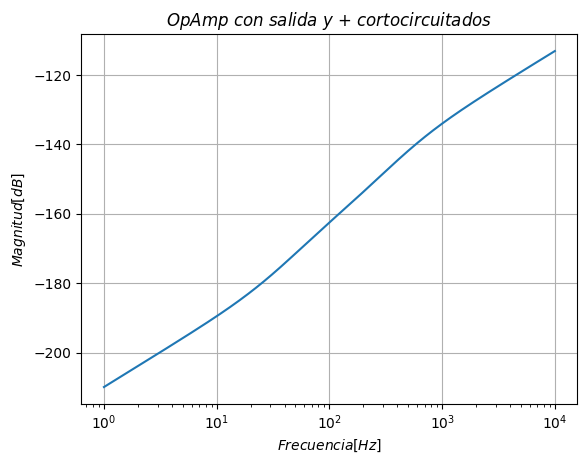

(array([ 3.,  7.,  4., 19., 15., 23., 15.,  6.,  5.,  3.]),
 array([8.99977093, 9.08090241, 9.16203388, 9.24316535, 9.32429683,
        9.4054283 , 9.48655977, 9.56769125, 9.64882272, 9.7299542 ,
        9.81108567]),
 <BarContainer object of 10 artists>)

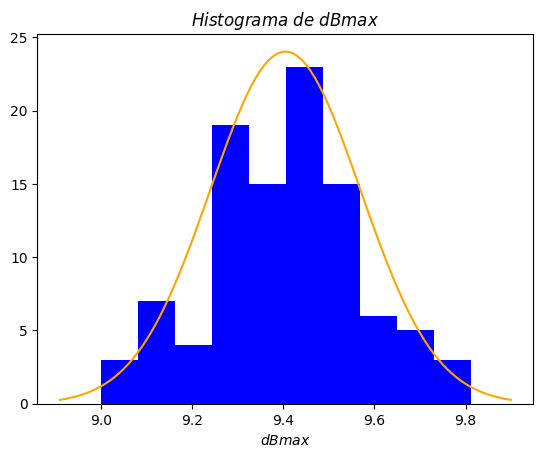

In [35]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


#Arreglo para histograma
dBmax = []

#Nombre del archivo .raw
montecarlo = "../ltspice/opamp_tl082 (montecarlo).raw"
gnd_tl = "../ltspice/opamp_tl082 (gnd).raw"
corto_tl = "../ltspice/opamp_tl082 (corto + y out).raw"

data_montecarlo = ltspice.Ltspice(montecarlo)
data_montecarlo.parse()

#Plot de montecarlo
    #Obtengo los datos de frecuencia
frec = data_montecarlo.get_frequency()

for i in range(0, data_montecarlo.getCaseNumber() - 1):
    vout_montecarlo = data_montecarlo.get_data ('V(vout)', i)

    #Obtengo el maximo de dB
    dBmax.append(np.real(max(20*np.log10(vout_montecarlo))))

    plt.semilogx(frec, 20*np.log10(vout_montecarlo), label='dB vout_montecarlo')


    #Grafico de dB(f)
plt.xlabel('$Frecuencia [Hz]$')
plt.ylabel('$Magnitud [dB]$')
plt.title('$Analisis$ $Montecarlo$ $de$ $dB(f)$')
plt.grid(True)

plt.show()

#Plot de gnd
data_gnd = ltspice.Ltspice(gnd_tl)
data_gnd.parse()

vout_gnd = data_gnd.get_data ('V(vout)')
plt.semilogx(frec, 20*np.log10(vout_gnd), label='dB vout_gnd')

plt.xlabel('$Frecuencia [Hz]$')
plt.ylabel('$Magnitud [dB]$')
plt.title('$OpAmp$ $referenciado$  $a$ $tierra$')
plt.grid(True)

plt.show()

#Plot de corto
data_corto = ltspice.Ltspice(corto_tl)
data_corto.parse()

vout_corto = data_corto.get_data ('V(vout)')
plt.semilogx(frec, 20*np.log10(vout_corto), label='dB vout_corto')

plt.xlabel('$Frecuencia [Hz]$')
plt.ylabel('$Magnitud [dB]$')
plt.title('$OpAmp$ $con$ $salida$ $y$ $+$ $cortocircuitados$')
plt.grid(True)

plt.show()



#Grafico de distribucion normal
    # Calcula la media
mu = np.mean(dBmax) #Media
    # Calcula la desviación estándar
sigma = np.std(dBmax) #Desviacion estandar


x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)  # Valores x para el rango deseado
y = 9.925 * (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * np.power((x - mu)/sigma, 2))

plt.plot(x, y, color = "orange")



#Grafico de histograma
plt.title('$Histograma$ $de$ $dBmax$')#Titulo
plt.xlabel('$dBmax$')#Etiqueta eje x


plt.hist(dBmax, color = "blue")



